In [162]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import json
%matplotlib notebook

<IPython.core.display.Javascript object>


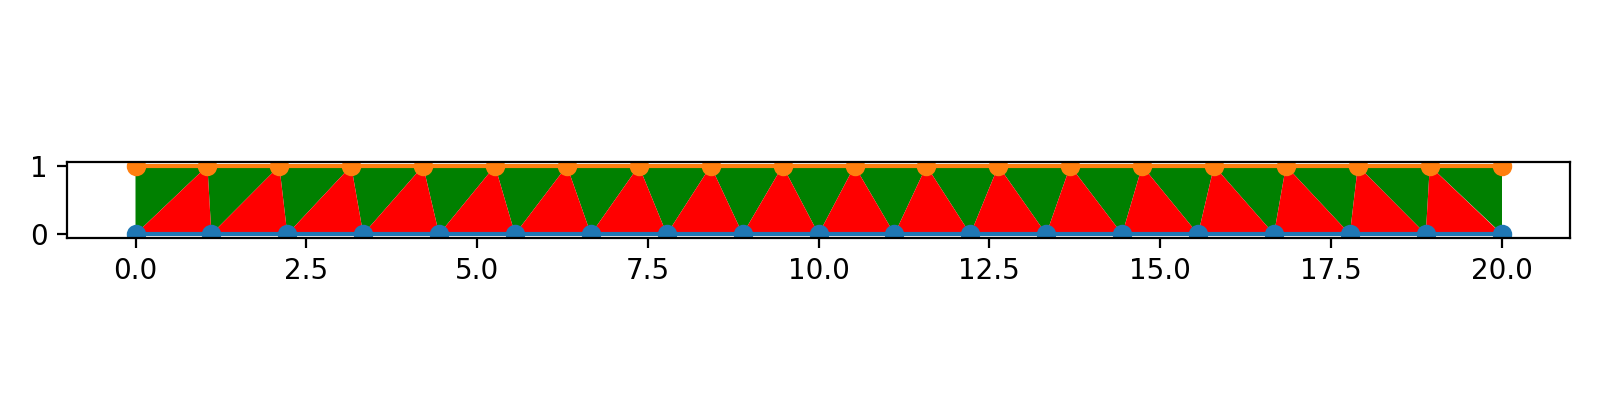

In [15]:
n = 20

pts_lower = np.array([np.linspace(0, n, n - 1), np.zeros(n - 1)]).T
pts_upper = np.array([np.linspace(0, n, n), np.ones(n)]).T

upper_tris = np.moveaxis(np.array([pts_upper[:-1], pts_upper[1:], pts_lower, pts_upper[:-1]]), 0, 1)
lower_tris = np.moveaxis(np.array([pts_lower[:-1], pts_lower[1:], pts_upper[1:-1], pts_lower[:-1]]), 0, 1)

plt.figure(figsize=(8, 2))
plt.plot(*pts_lower.T, 'o-')
plt.plot(*pts_upper.T, 'o-')

for tri in upper_tris:
    plt.fill(*tri.T, 'g')
for tri in lower_tris:
    plt.fill(*tri.T, 'r')

plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


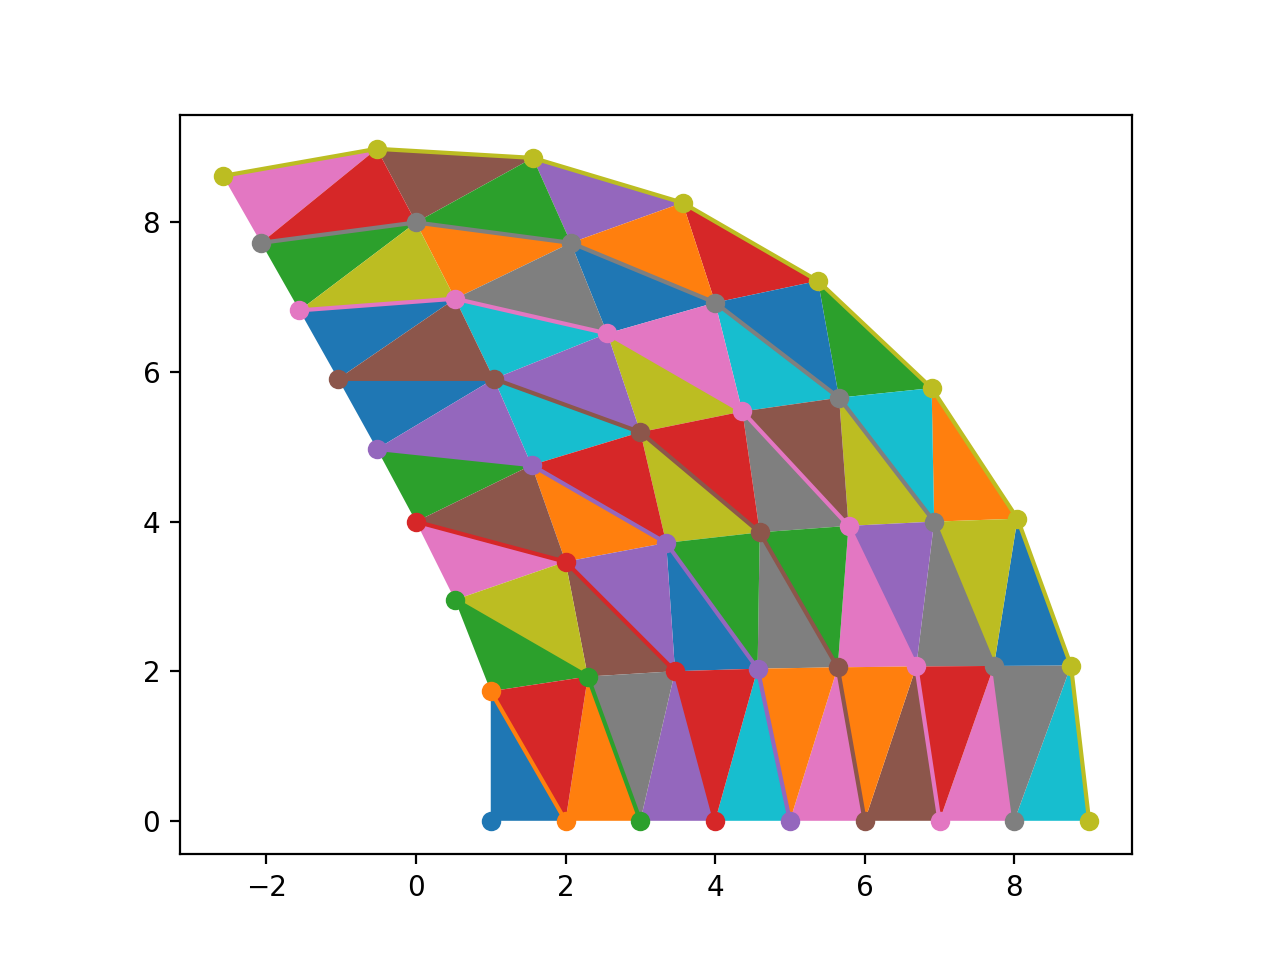

In [30]:
n = 10
n_sym = 3

pts = []
plt.figure()
for i in range(1, n):
    t = np.linspace(0, 2 * np.pi / n_sym, i + 1)[:-1]
    x = i * np.cos(t)
    y = i * np.sin(t)
    this_points = np.array([x, y]).T
    plt.plot(x, y, 'o-')
    
    if i > 1:
        last_points = pts[-1]
        tris = np.concatenate([np.moveaxis(np.array([
            last_points, this_points[:-1], this_points[1:]
        ]), 0, 1), np.moveaxis(np.array([
            last_points[:-1], this_points[1:-1], last_points[1:]
        ]), 0, 1)])
        for tri in tris:
            plt.fill(*tri.T)
    
    pts.append(this_points)

plt.gca().set_aspect('equal')
plt.show()

14850 verts and 29401 tris
done writing file


<IPython.core.display.Javascript object>


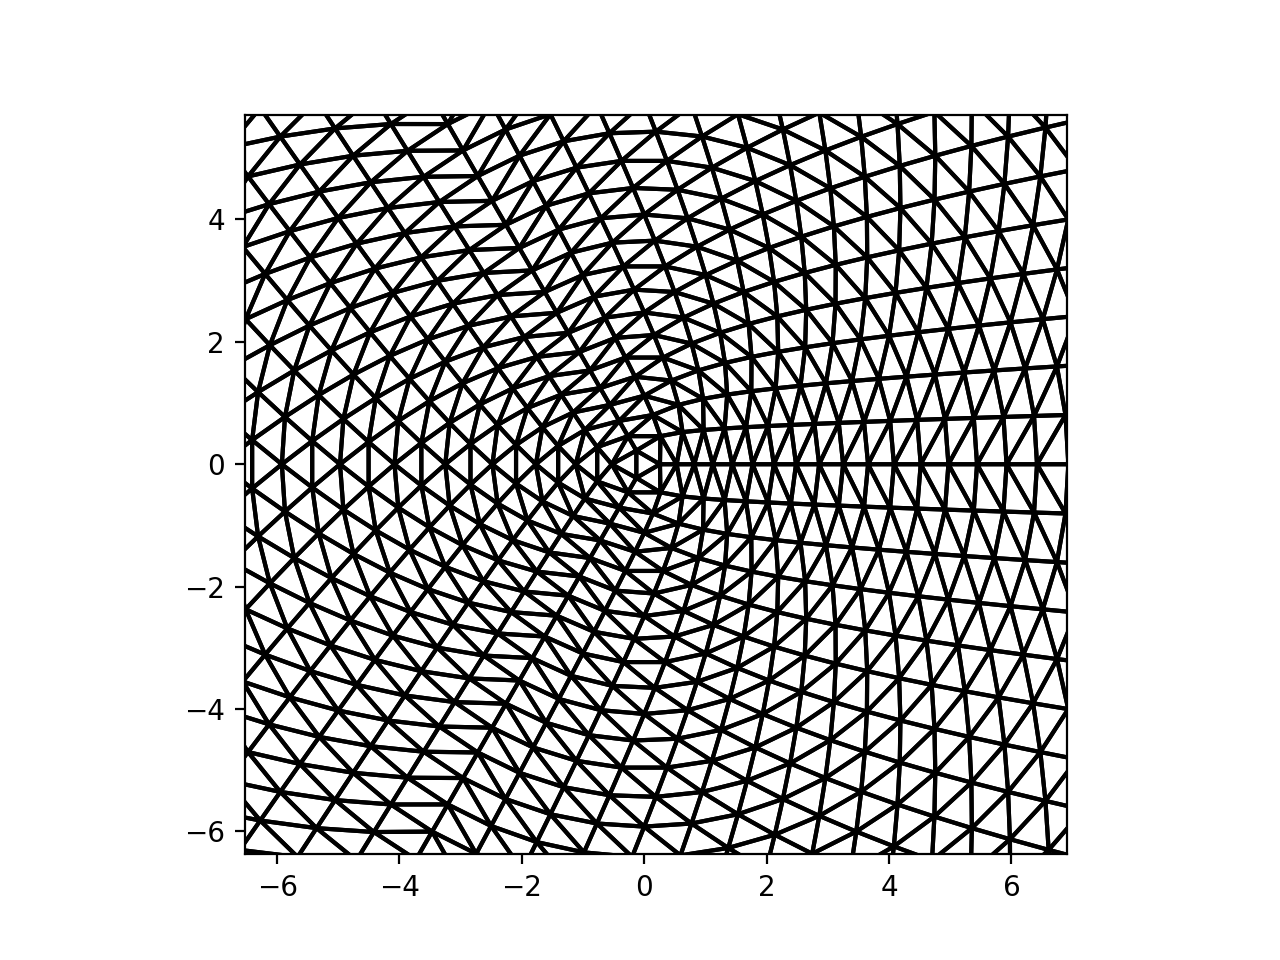

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 29401/29401 [00:12<00:00, 2358.07it/s]


In [166]:
n = 100
n_sym = 3
# gamma = 1.5
B = 0.25

pts = []
for i in range(1, n):
    t = np.linspace(0, 2 * np.pi, i * n_sym + 1)[:-1]
#     r = (i / (n - 1)) ** gamma
    r = i / n
    r = (1 - B) * r ** 2 + B * r
    x = r * np.cos(t)
    y = r * np.sin(t)
    pts.append(np.array([x, y]).T)
pts = np.concatenate(pts) * 100

i = np.arange(n)
offsets = n_sym * i * (i + 1) // 2
tris = [np.array([[0, 1, 2]])]
for i0, o0, o1 in zip(i[1:], offsets[:-2], offsets[1:-1]):
    
    tris1 = np.concatenate([
        np.array([o0 + np.arange(i0 + 1), o1 + np.arange(i0 + 1), o1 + 1 + np.arange(i0 + 1)]).T,
        np.array([o0 + np.arange(i0 + 1) + i0, o1 + np.arange(i0 + 1) + i0 + 1, o1 + 1 + np.arange(i0 + 1) + i0 + 1]).T,
        np.array([(o0 + np.arange(i0 + 1) + 2 * i0), o1 + np.arange(i0 + 1) + 2 * (i0 + 1), o1 + 1 + np.arange(i0 + 1) + 2 * (i0 + 1)]).T,        
    ])
    tris1[-1, 0] -= i0 * n_sym
    tris1[-1, 2] -= (i0 + 1) * n_sym
    tris.append(tris1)
    
    tris2 = np.concatenate([
        np.array([o0 + np.arange(i0), o1 + 1 + np.arange(i0), o0 + 1 + np.arange(i0)]).T,
        np.array([o0 + np.arange(i0) + i0, o1 + 1 + np.arange(i0) + i0 + 1, o0 + 1 + np.arange(i0) + i0]).T,
        np.array([o0 + np.arange(i0) + 2 * i0, o1 + 1 + np.arange(i0) + 2 * (i0 + 1), o0 + 1 + np.arange(i0) + 2 * i0]).T,
    ])
    tris2[-1, 2] -= i0 * n_sym
    tris.append(tris2)
tris = np.concatenate(tris)
print(f'{len(pts)} verts and {len(tris)} tris')

with open('circle_mesh.js', 'w') as f:
    f.write('camera_mesh = ')
    json.dump(dict(verts=pts.tolist(), tris=tris.tolist()), f, indent=2)
    f.write(';')
print('done writing file')

plt.figure()
for tri in tqdm(tris[:, [0, 1, 2, 0]]):
    plt.plot(*pts[tri].T, 'k')
plt.gca().set_aspect('equal')
plt.show()

In [167]:
172 / 255, 214 / 255, 242 / 255, 1

(0.6745098039215687, 0.8392156862745098, 0.9490196078431372, 1)

In [168]:
a = np.deg2rad(40)
np.cos(a), np.sin(a)

(0.766044443118978, 0.6427876096865393)